# PS1-2 Incomplete, Positive-Only Labels

## c. Coding Problem

### 1. Import Library

In [877]:
import math
import numpy as np
import matplotlib.pyplot as plt

import Full_Problem_Set.PS1.src.util as util
from Full_Problem_Set.PS1.src.linear_model import LinearModel

### 2. Load Dataset

In [878]:
#Training set:
x_train, t_train = util.load_dataset("/home/anhnt02/Desktop/CS229-Fall2018-FullCourse/Full_Problem_Set/PS1/data/ds3_train.csv", add_intercept=True, label_col='t')
#Validation set
x_valid, t_valid = util.load_dataset("/home/anhnt02/Desktop/CS229-Fall2018-FullCourse/Full_Problem_Set/PS1/data/ds3_valid.csv", add_intercept=True, label_col='t')
#Test set
x_test, t_test = util.load_dataset("/home/anhnt02/Desktop/CS229-Fall2018-FullCourse/Full_Problem_Set/PS1/data/ds3_test.csv", add_intercept=True, label_col='t')

### 3. Plot dataset

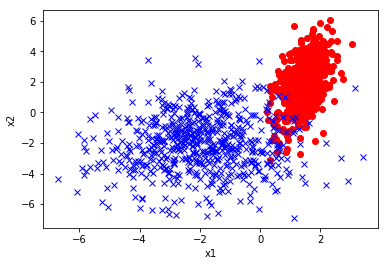

In [879]:
plt.xlabel('x1')
plt.ylabel('x2')
plt.plot(x_train[t_train == 1, 1], x_train[t_train == 1, 2] , 'ro', linewidth = 2)
plt.plot(x_train[t_train == 0, 1], x_train[t_train == 0, 2], 'bx', linewidth = 2)
plt.show()

### 4. Implement Logistic Regression

In [880]:
class LogisticRegression(LinearModel):
    """Logistic regression with Newton's Method as the solver.

    Example usage:
        > clf = LogisticRegression()
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """
    #Initialize Constructor
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.theta = None
        self.x = None
        self.y = None


    def fit(self, x, y):
        """Run Newton's Method to minimize J(theta) for logistic regression.

        Args:
            x: Training example inputs. Shape (m, n).
            y: Training example labels. Shape (m,).
        """
        # *** START CODE HERE ***
        m, n = x.shape

        #1. Initialize Theta value
        if self.theta is None:
            self.theta = np.zeros((n, 1))

        #2. Sigmoid Function
        def sigmoid(x, theta):
            return 1 / (1 + np.exp(- x @ theta))

        #3. Gradient of Cost Function
        def gradient(x, y, theta):
            return 1/m * x.T @ (sigmoid(x, theta) - y.reshape(-1, 1))

        #4. Hessian Matrix
        def hessian(x, theta):
            return 1/m * x.T @ (x * sigmoid(x, theta) * (1 - sigmoid(x, theta)))

        #5. Newton Method
        theta_old = np.ones((n, 1))
        while np.linalg.norm(theta_old - self.theta, 1) >= self.eps:
            theta_old = self.theta.copy()
            self.theta -= np.linalg.inv(hessian(x, self.theta)) @ gradient(x, y, self.theta)
        # *** END CODE HERE ***

    def predict(self, x):
        """Make a prediction given new inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Outputs of shape (m,).
        """
        # *** START CODE HERE ***
        g = 1 / (1 + np.exp(-x @ self.theta))
        return g >= 0.5
        # *** END CODE HERE ***

### 5. Training Model

In [881]:
clf = LogisticRegression()
clf.fit(x_train, t_train)
print("x_train shape:", x_train.shape)
print("t_train shape:", t_train.shape)
print("theta shape:", clf.theta.shape)
print("Theta: ", clf.theta.reshape(-1))

x_train shape: (1250, 3)
t_train shape: (1250,)
theta shape: (3, 1)
Theta:  [-0.9711418   2.73208784  1.07403478]


### 6. Predict Phase

In [882]:
t_train_pred = clf.predict(x_train)
t_valid_pred = clf.predict(x_valid)
t_test_pred = clf.predict(x_test)

### 7. Report Accuracy

In [883]:
def accuracy(y_true, y_pred):
    summ_correct = 0
    for i in range(len(y_true)):
        if(y_true[i] == y_pred[i]):
            summ_correct += 1
    return summ_correct / len(y_true)

In [884]:
#Train accuracy
accuracy_train = accuracy(t_train, t_train_pred)
#Valid accuracy
accuracy_valid = accuracy(t_valid, t_valid_pred)
#Test accuracy
accuracy_test = accuracy(t_test, t_test_pred)

### 8. Plot the Prediction

TRAIN: Theta:  [-0.9711418   2.73208784  1.07403478]
Training Accuracy:  0.9632


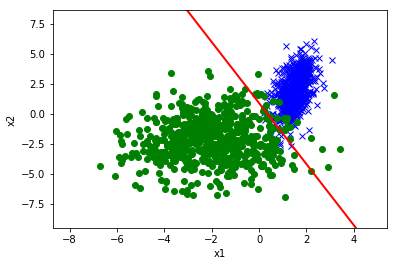

In [885]:
print("TRAIN: Theta: ", clf.theta.reshape(-1))
print("Training Accuracy: ", accuracy_train)
util.plot(x_train, t_train, theta = clf.theta)

VALID: Theta:  [-0.9711418   2.73208784  1.07403478]
Training Accuracy:  0.9596774193548387


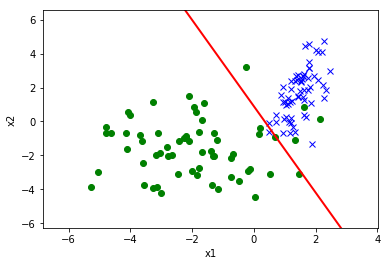

In [886]:
print("VALID: Theta: ", clf.theta.reshape(-1))
print("Training Accuracy: ", accuracy_valid)
util.plot(x_valid, t_valid, theta = clf.theta)

TEST: Theta:  [-0.9711418   2.73208784  1.07403478]
Validation Accuracy:  0.9838709677419355


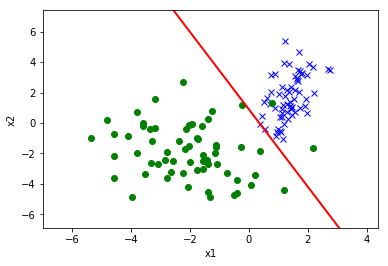

In [887]:
print("TEST: Theta: ", clf.theta.reshape(-1))
print("Validation Accuracy: ", accuracy_test)
util.plot(x_test, t_test, theta = clf.theta)

## d. Coding Problem

### 1. Load Dataset

In [888]:
#Training set
x_train, y_train = util.load_dataset("/home/anhnt02/Desktop/CS229-Fall2018-FullCourse/Full_Problem_Set/PS1/data/ds3_train.csv", add_intercept=True)
#Validation set
x_valid, y_valid = util.load_dataset("/home/anhnt02/Desktop/CS229-Fall2018-FullCourse/Full_Problem_Set/PS1/data/ds3_valid.csv", add_intercept=True)
#Testing set
x_test, y_test = util.load_dataset("/home/anhnt02/Desktop/CS229-Fall2018-FullCourse/Full_Problem_Set/PS1/data/ds3_test.csv", add_intercept=True)

### 2. Plot dataset

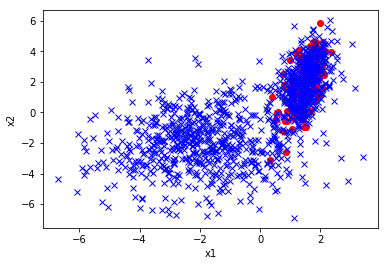

In [889]:
plt.xlabel('x1')
plt.ylabel('x2')
plt.plot(x_train[y_train == 1, 1], x_train[y_train == 1, 2] , 'ro', linewidth = 2,)
plt.plot(x_train[y_train == 0, 1], x_train[y_train == 0, 2] , 'bx', linewidth = 2,)
plt.show()

### 3. Training Model

In [890]:
clf_2 = LogisticRegression()
clf_2.fit(x_train, y_train)

### 4. Predict Phace

In [891]:
#Training
y_train_pred = clf_2.predict(x_train)
#Validation
y_valid_pred = clf_2.predict(x_valid)
#Testing
y_test_pred = clf_2.predict(x_test)

### 5. Report accuracy

In [892]:
#Training
accuracy_train = accuracy(y_train, y_train_pred)
#Validation
accuracy_valid = accuracy(y_valid, y_valid_pred)
#Tesing
accuracy_test = accuracy(y_test, y_test_pred)

### 6. Plot the prediction

TRAIN: Theta:  [-2.91607454  0.78596651  0.09282768]
The training accuracy:  0.9


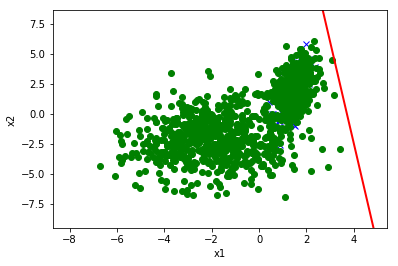

In [893]:
print("TRAIN: Theta: ", clf_2.theta.reshape(-1))
print("The training accuracy: ", accuracy_train)
util.plot(x_train, y_train, theta = clf_2.theta)

VALID: Theta:  [-2.91607454  0.78596651  0.09282768]
The validation accuracy:  0.9032258064516129


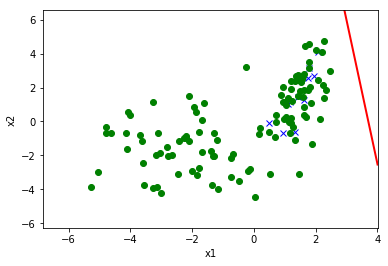

In [894]:
print("VALID: Theta: ", clf_2.theta.reshape(-1))
print("The validation accuracy: ", accuracy_valid)
util.plot(x_valid, y_valid, theta = clf_2.theta)

TEST: Theta:  [-2.91607454  0.78596651  0.09282768]
The testing accuracy:  0.8870967741935484


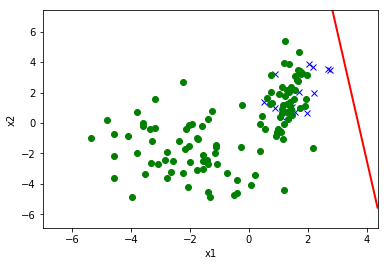

In [895]:
print("TEST: Theta: ", clf_2.theta.reshape(-1))
print("The testing accuracy: ", accuracy_test)
util.plot(x_test, y_test, theta = clf_2.theta)

## e. Coding Problem

### 1. Estimate all x^(i) in V+ set

In [896]:
#Load Validation set
x_valid, y_valid = util.load_dataset("/home/anhnt02/Desktop/CS229-Fall2018-FullCourse/Full_Problem_Set/PS1/data/ds3_valid.csv", add_intercept=True)

In [897]:
x_valid_plus = x_valid[y_valid == 1]

### 2. Calculate alpha

In [898]:
# Sigmoid Function
def sigmoid(x, theta):
    return 1 / (1 + np.exp(-x @ theta))

In [899]:
#Estimate alpha
def alpha(x_plus):
    #h(x^(i)
    h = 0
    for i in range(len(x_plus)):
        h += sigmoid(x_plus[i].reshape(1, -1), clf_2.theta) #theta is old theta from training set
    #calculate alpha value
    return 1 / len(x_plus) * h

### 3. Update Theta

In [900]:
new_theta = clf_2.theta.copy()
new_theta[0] = clf_2.theta[0] + np.log((2 - alpha(x_valid_plus)) / alpha(x_valid_plus)) #Update only theta 0 because just theta 0 is changed

### 4. Predict in Test set

In [901]:
#Load test set
x_test, t_test = util.load_dataset("/home/anhnt02/Desktop/CS229-Fall2018-FullCourse/Full_Problem_Set/PS1/data/ds3_test.csv", add_intercept=True, label_col='t')

In [902]:
def predict_plus(x, theta):
    return sigmoid(x, theta) >= 0.5

In [903]:
#Predict in test set
t_test_pred_plus = predict_plus(x_test, new_theta)

### 5. Report Accuracy

In [904]:
accuracy_test_plus = accuracy(t_test, t_test_pred_plus)

### 6. Plot the Prediction

New theta:  [-0.55096984  0.78596651  0.09282768]
The test_plus accuracy:  0.9516129032258065


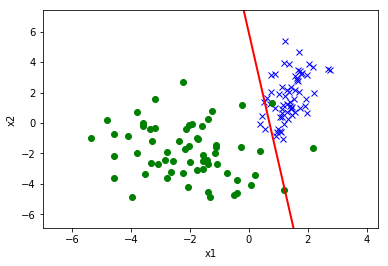

In [905]:
print("New theta: ", new_theta.reshape(-1))
print("The test_plus accuracy: ", accuracy_test_plus)
util.plot(x_test, t_test, theta = new_theta)